# Section 4.1 — Simple linear regression

This notebook contains the code examples from [Section 4.1 Simple linear regression]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn"t work
from plot_helpers import RCPARAMS
RCPARAMS.update({"figure.figsize": (5, 3)})   # good for screen
# RCPARAMS.update({"figure.figsize": (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

# Where to store figures
DESTDIR = "figures/lm/simple"

<Figure size 640x480 with 0 Axes>

In [3]:
from plot_helpers import plot_residuals
from plot_helpers import plot_residuals2
from plot_helpers import savefigure

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
import warnings
# silence kurtosistest warning when using n < 20
warnings.filterwarnings("ignore", category=UserWarning)

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

$$
\newcommand{\CI}[1]{\textbf{CI}_{#1}}
\newcommand{\CIL}[1]{\textbf{L}_{#1}}
\newcommand{\CIU}[1]{\textbf{U}_{#1}}
\newcommand{\ci}[1]{\textbf{ci}_{#1}}
\newcommand{\cil}[1]{\textbf{l}_{#1}}
\newcommand{\ciu}[1]{\textbf{u}_{#1}}
$$


(this cell contains the macro definitions like $\stderr{\overline{\mathbf{x}}}$, $\stderrhat{}$, $\Mean$, ...)

## Definitions

## Linear model

Saved figure to figures/lm/simple/linear_model_xy_with_gaussians.pdf
Saved figure to figures/lm/simple/linear_model_xy_with_gaussians.png


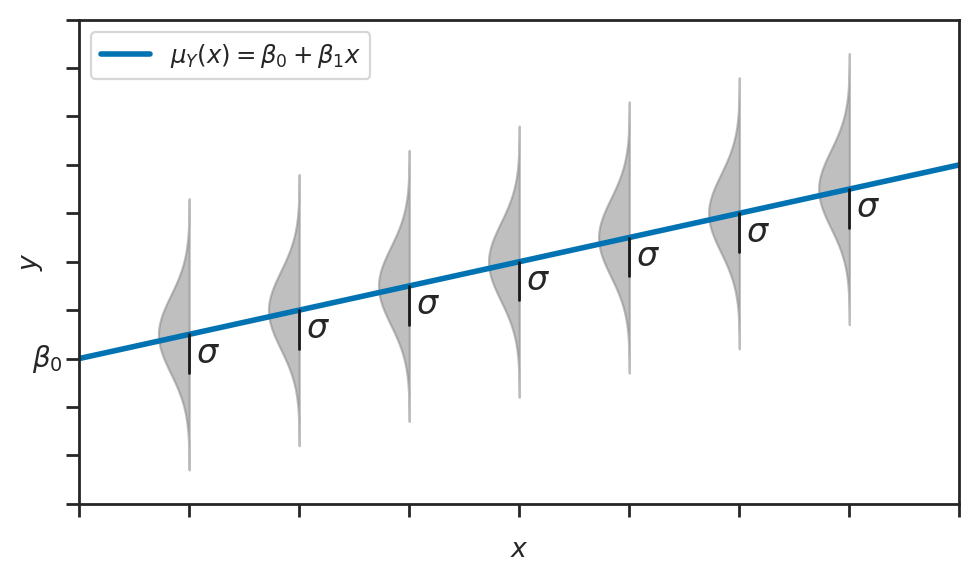

In [6]:
from scipy.stats import norm

# Define the linear model function
def linear_model(x):
    return 30 + 5 * x

# Define sigma for the normal distribution
sigma = 8

with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the linear model
    xs = np.linspace(0, 8, 200)
    ys = linear_model(xs)
    sns.lineplot(x=xs, y=ys, ax=ax, label=r"$\mu_Y(x) = \beta_0 + \beta_1x$", linewidth=2)
    
    # Plot Gaussian distributions at specified x positions and add sigma lines
    x_positions = range(1,8)
    for x_pos in x_positions:
        y_pos = linear_model(x_pos)
        ys = np.linspace(y_pos-3.5*sigma, y_pos+3.5*sigma, 100)
        pdf = 0.7*norm(loc=y_pos, scale=sigma).pdf(ys)
        ax.fill_betweenx(ys, x_pos - pdf * sigma, x_pos, color="grey", alpha=0.5)
        # Draw vertical sigma line and label it on the opposite side of the Gaussian shape
        ax.plot([x_pos, x_pos], [y_pos, y_pos - sigma], "k", lw=1)
        ax.text(x_pos + 0.06, y_pos - sigma / 2, r"$\sigma$", fontsize=12, va="center")

    # y-intercept
    ax.text(0 - 0.15, 30, r"$\beta_0$", fontsize=10, va="center", ha="right")

    # Set up x-axis
    ax.set_xlim([0, 8])
    ax.set_xlabel("$x$")
    ax.set_xticklabels([])
    
    # Set up y-axis
    ax.set_ylim([0, 100])
    ax.set_ylabel("$y$")
    ax.set_yticks(range(0,110,10))
    ax.set_yticklabels([])
    
    ax.legend(loc="upper left")

filename = os.path.join(DESTDIR, "linear_model_xy_with_gaussians.pdf")
savefigure(fig, filename)

## Example: students score as a function of effort

In [7]:
students = pd.read_csv("../datasets/students.csv")
students.head()

,student_ID,background,curriculum,effort,score
0,1,arts,debate,10.96,75.0
1,2,science,lecture,8.69,75.0
2,3,arts,debate,8.60,67.0
3,4,arts,lecture,7.92,70.3
4,5,science,debate,9.90,76.1


Saved figure to figures/lm/simple/students_scores_vs_effort_scatterplot.pdf
Saved figure to figures/lm/simple/students_scores_vs_effort_scatterplot.png


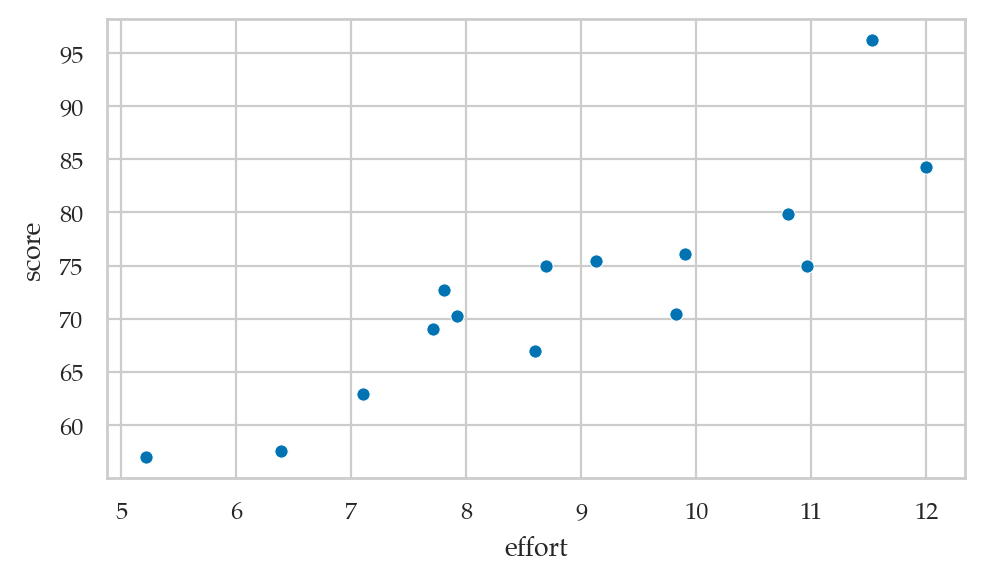

In [8]:
sns.scatterplot(data=students, x="effort", y="score");

filename = os.path.join(DESTDIR, "students_scores_vs_effort_scatterplot.pdf")
savefigure(plt.gcf(), filename)

## Parameter estimation using least squares

In [9]:
import statsmodels.formula.api as smf
lm1 = smf.ols("score ~ 1 + effort", data=students).fit()

In [10]:
# the estimated parameters of the best-fit line
lm1.params

Intercept    32.465809
effort        4.504850
dtype: float64

In [11]:
# Extract the intercept and slope for use 
b0 = lm1.params["Intercept"]
b1 = lm1.params["effort"]
b0, b1

(32.465809301599606, 4.504850344209074)

Saved figure to figures/lm/simple/students_scores_vs_effort_with_line.pdf
Saved figure to figures/lm/simple/students_scores_vs_effort_with_line.png


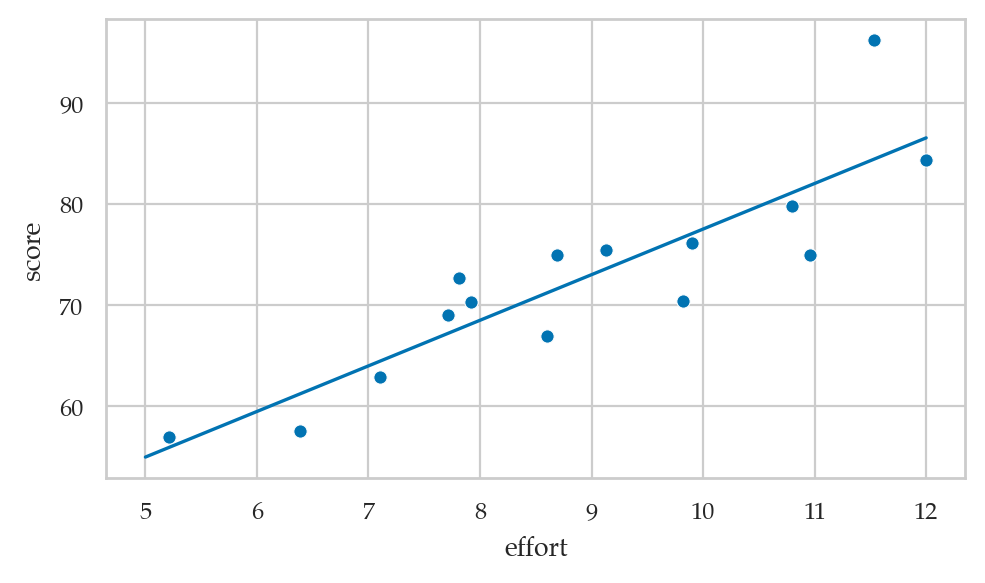

In [12]:
es = np.linspace(5, 12)
shats = b0 + b1*es
sns.lineplot(x=es, y=shats, color="b");
sns.scatterplot(data=students, x="effort", y="score")

filename = os.path.join(DESTDIR, "students_scores_vs_effort_with_line.pdf")
savefigure(plt.gcf(), filename)

In [13]:
# # ALT.
# sns.regplot(data=students, x="effort", y="score", ci=None);

### Least squares optimization for the parameters

How do we find the parameter estimates of the model?

Saved figure to figures/lm/simple/students_scores_with_residuals.pdf
Saved figure to figures/lm/simple/students_scores_with_residuals.png


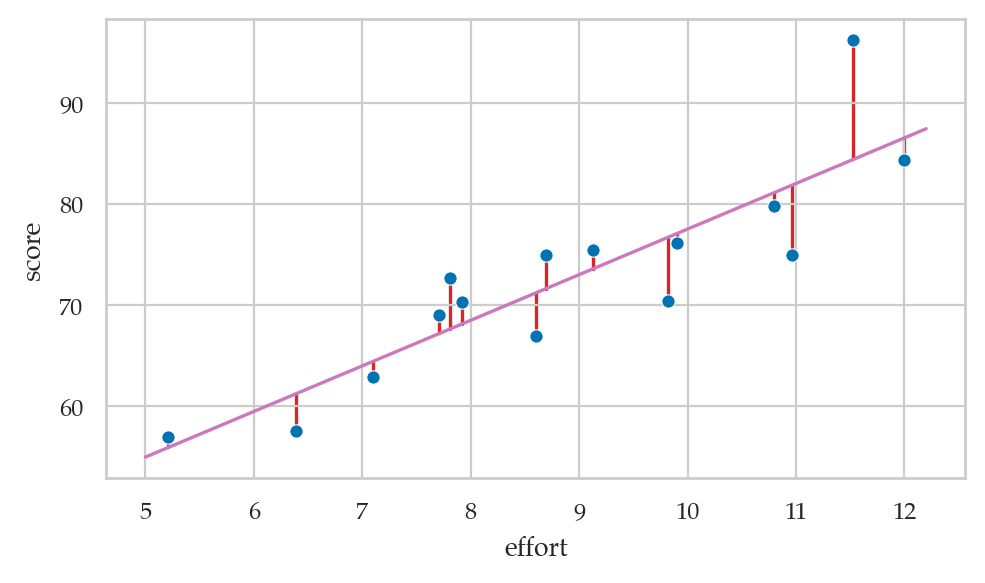

In [14]:
plot_residuals(students["effort"], students["score"], b0, b1)
sns.scatterplot(data=students, x="effort", y="score")
es = np.linspace(5, 12.2)
shats = b0 + b1*es
sns.lineplot(x=es, y=shats, color="C4");

filename = os.path.join(DESTDIR, "students_scores_with_residuals.pdf")
savefigure(plt.gcf(), filename)

Saved figure to figures/lm/simple/students_scores_with_residuals_squared.pdf
Saved figure to figures/lm/simple/students_scores_with_residuals_squared.png


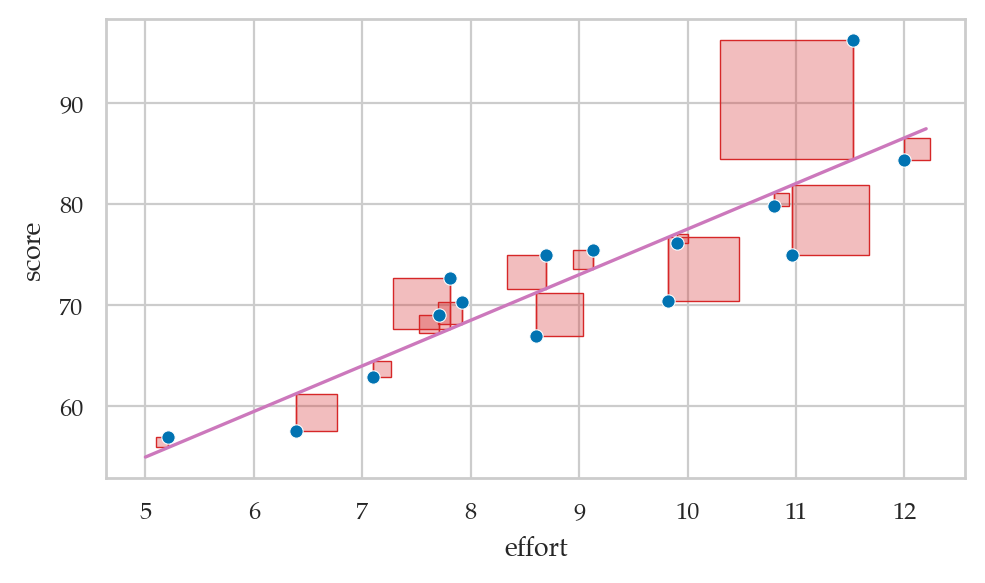

In [15]:
ax = sns.scatterplot(data=students, x="effort", y="score", zorder=4)
es = np.linspace(5, 12.2)
shats = b0 + b1*es
sns.lineplot(x=es, y=shats, color="C4", zorder=5)
plot_residuals2(students["effort"], students["score"], b0, b1, ax=ax);

filename = os.path.join(DESTDIR, "students_scores_with_residuals_squared.pdf")
savefigure(plt.gcf(), filename)

### Estimating the standard deviation parameter

In [16]:
#######################################################
SSR = np.sum(lm1.resid**2)
n = len(students)
sigmahat = np.sqrt( SSR / (n-2) )
sigmahat

4.929598282660258

In [17]:
# ALT.
# sigmahat = np.sqrt(lm1.scale)

## Model diagnostics

### Residuals plots

Saved figure to figures/lm/simple/residuals_plot_vs_effort.pdf
Saved figure to figures/lm/simple/residuals_plot_vs_effort.png


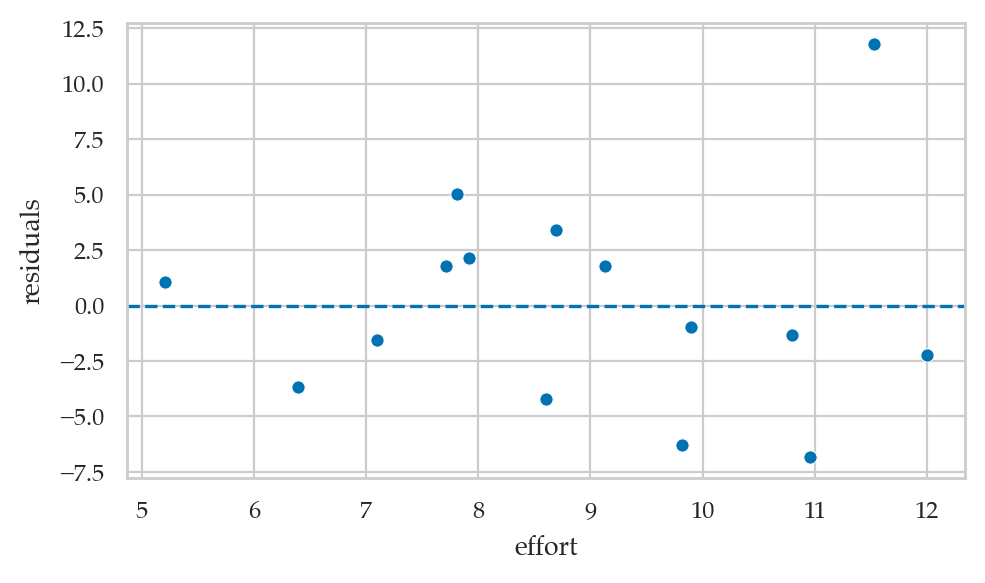

In [18]:
ax = sns.scatterplot(x=students["effort"], y=lm1.resid)
ax.set_ylabel("residuals")
ax.axhline(y=0, color="b", linestyle="dashed");

filename = os.path.join(DESTDIR, "residuals_plot_vs_effort.pdf")
savefigure(plt.gcf(), filename)

In [19]:
# # ALT.
# sns.residplot(data=students, x="effort", y="score", lowess=True, color="g");

### Sum of squares quantities

In [20]:
lm1.ess

1078.2917900307098

In [21]:
lm1.ssr

315.91220996929053

In [22]:
lm1.centered_tss

1394.2040000000002

### Coefficient of determination $R^2$

In [23]:
lm1.ess / lm1.centered_tss

0.7734103402591799

In [24]:
lm1.rsquared

0.7734103402591798

#### Related to the Pearson correlation coefficient

In [25]:
efforts = students["effort"]
scores = students["score"]
pearson_r = efforts.corr(scores)
pearson_r**2

0.7734103402591799

In [26]:
# ALT.
from scipy.stats import pearsonr
r = pearsonr(efforts, scores)[0]
r**2

0.7734103402591799

### Model summary table

In [27]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     44.37
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.56e-05
Time:                        23:35:49   Log-Likelihood:                -44.140
No. Observations:                  15   AIC:                             92.28
Df Residuals:                      13   BIC:                             93.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.4658      6.155      5.275      0.000      19.169      45.763
effort         4.5049      0.676      6.661      0.000       3.044       5.966
==============================================================================
Omnibus:                        4.062   Durbin-Watson:                   2.667
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                1.777
Skew:                           0.772   Prob(JB):                        0.411
Kurtosis:                       3.677   Cond. No.                         44.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using linear models to make predictions

### Confidence interval for observations

### Confidence interval for the mean

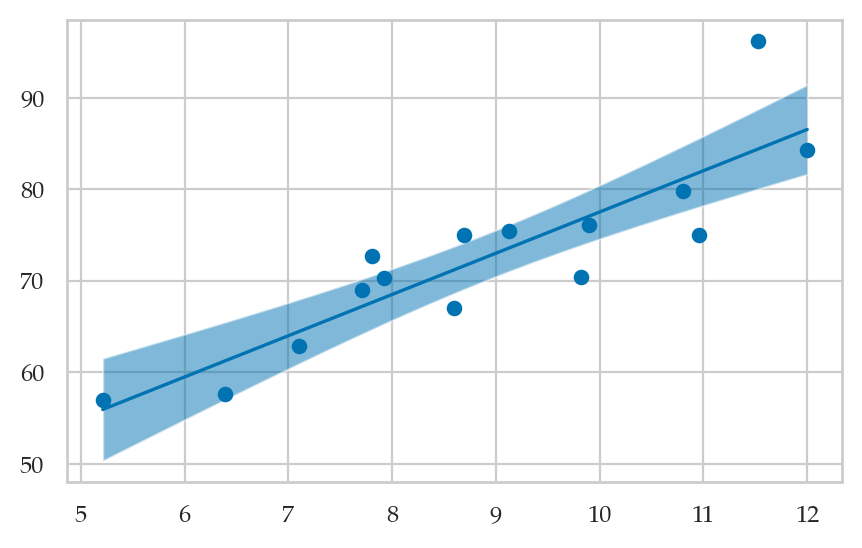

In [28]:
from plot_helpers import simple_regplot

efforts = students["effort"]
scores = students["score"]

simple_regplot(efforts, scores)

## Explanations

### Strategies for fitting linear models

#### Analytical formulas

In [29]:
efforts = students["effort"]
scores = students["score"]

meaneffort = efforts.mean()
meanscore = scores.mean()
#######################################################
num = sum((efforts - meaneffort)*(scores - meanscore))
denom = sum( (efforts - meaneffort)**2 )
b1 = num / denom
b1

4.504850344209071

In [30]:
# # ALT.
# np.cov(efforts, scores, ddof=0)[0,1] / np.var(efforts, ddof=0)

In [31]:
b0 = scores.mean() - b1*efforts.mean()
b0

32.46580930159963

## Discussion

## Exercises

In [32]:
lm1.predict(), lm1.fittedvalues

(array([81.83896907, 71.61295879, 71.20752226, 68.14422403, 77.06382771,
        81.11819302, 67.64869049, 73.59509294, 55.93607959, 67.19820546,
        76.70343968, 84.40673377, 64.45024675, 61.251803  , 86.52401343]),
 0     81.838969
 1     71.612959
 2     71.207522
 3     68.144224
 4     77.063828
 5     81.118193
 6     67.648690
 7     73.595093
 8     55.936080
 9     67.198205
 10    76.703440
 11    84.406734
 12    64.450247
 13    61.251803
 14    86.524013
 dtype: float64)

## Links